#**Aula 3: Editando imagens**

##**Selecionando o modelo**

Modelo: [BRIA Background Removal v1.4](https://huggingface.co/briaai/RMBG-1.4)

In [ ]:
from transformers import pipeline
image_path = "https://farm5.staticflickr.com/4007/4322154488_997e69e4cf_z.jpg"
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

MyConfig.py:   0%|          | 0.00/326 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyConfig.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


MyPipe.py:   0%|          | 0.00/2.92k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyPipe.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


briarmbg.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- briarmbg.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/176M [00:00<?, ?B/s]

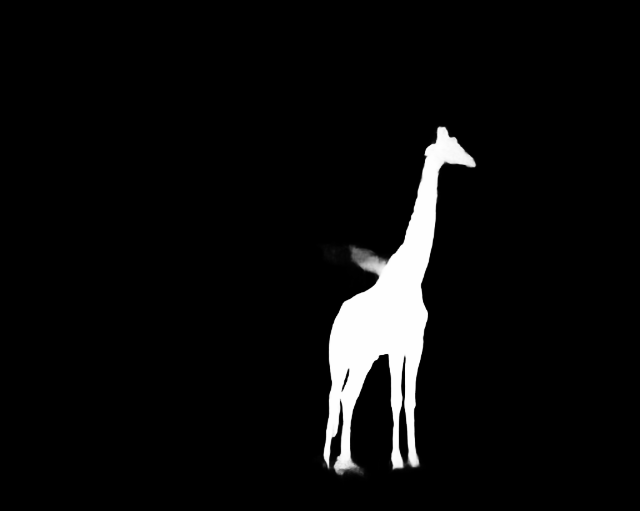

In [ ]:
pillow_mask

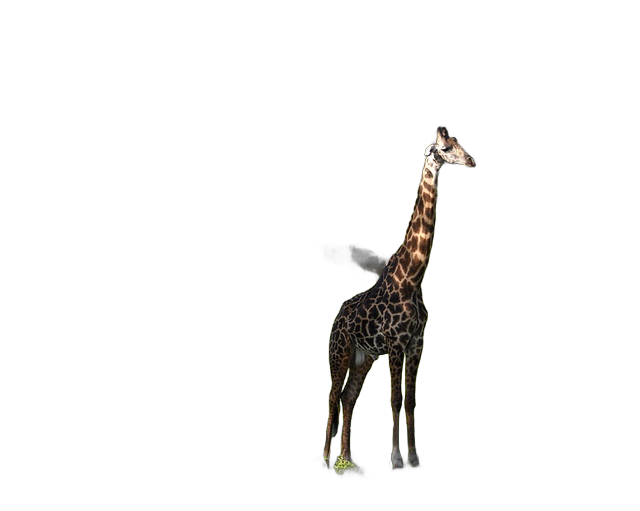

In [ ]:
pillow_image

##**Aplicando o modelo aos dados**

In [ ]:
from transformers import pipeline
image_path = "/content/jonathan-talbert-VtIQwaUn-GE-unsplash.jpg"
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image

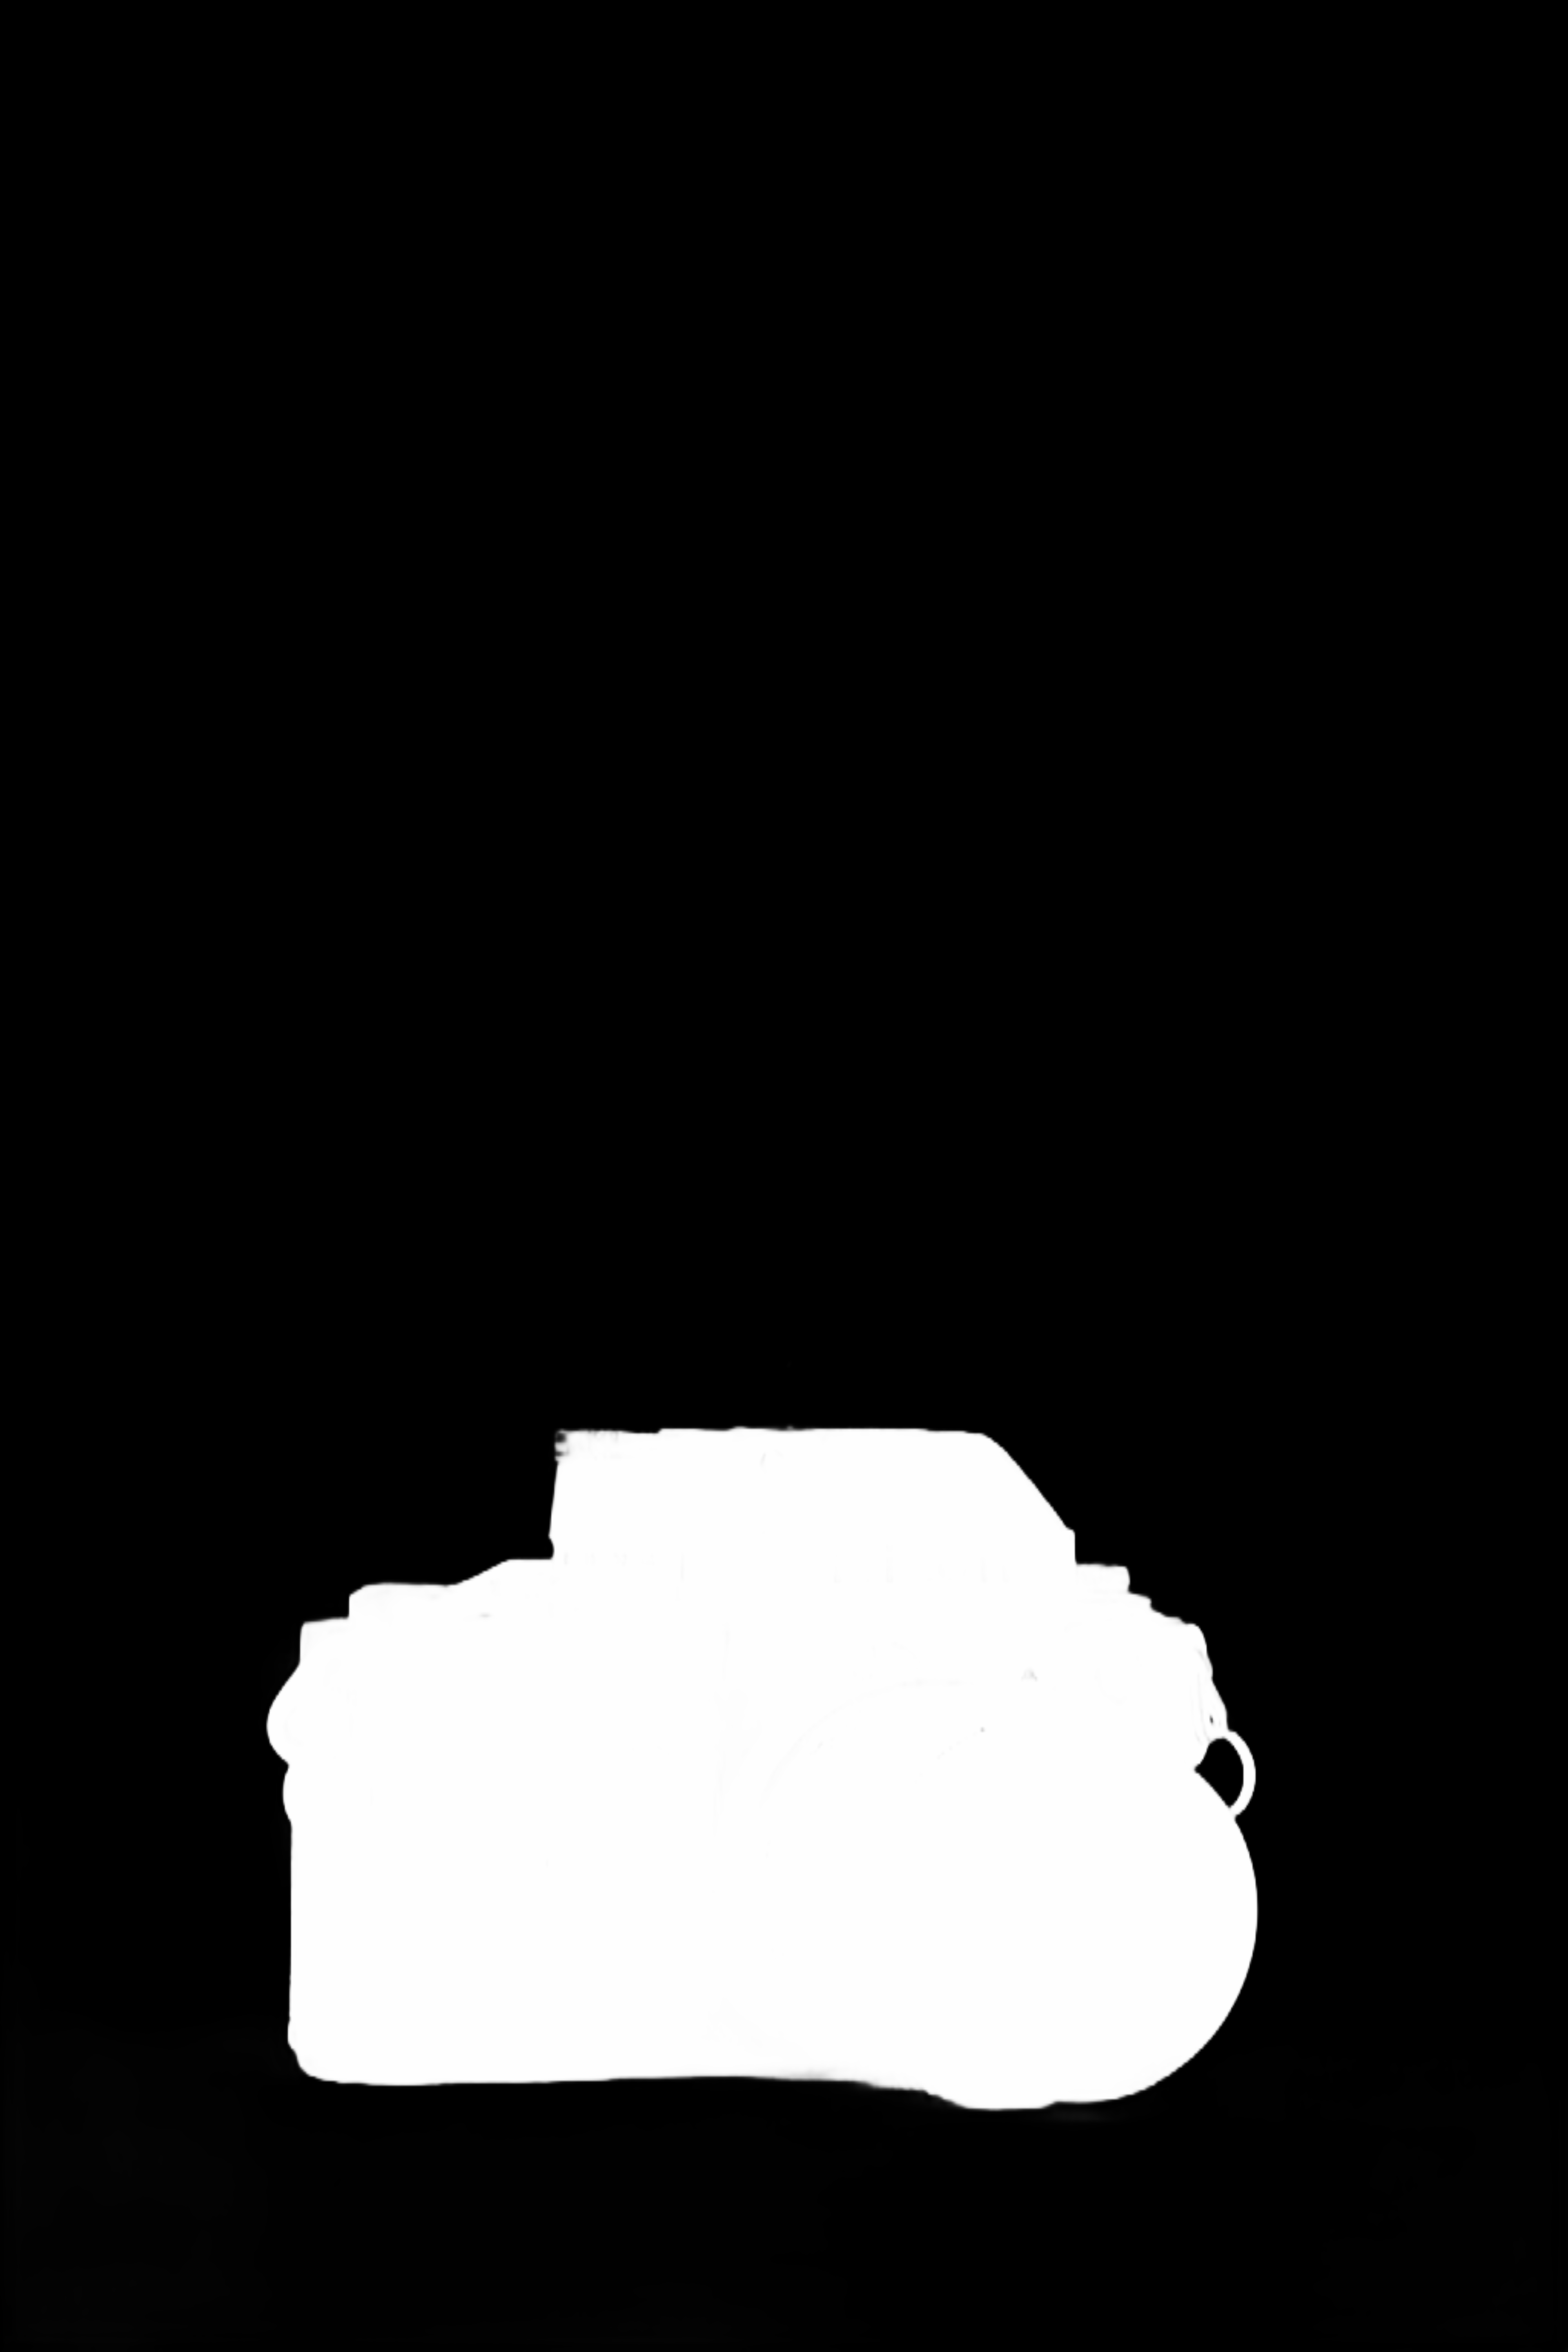

In [ ]:
pillow_mask

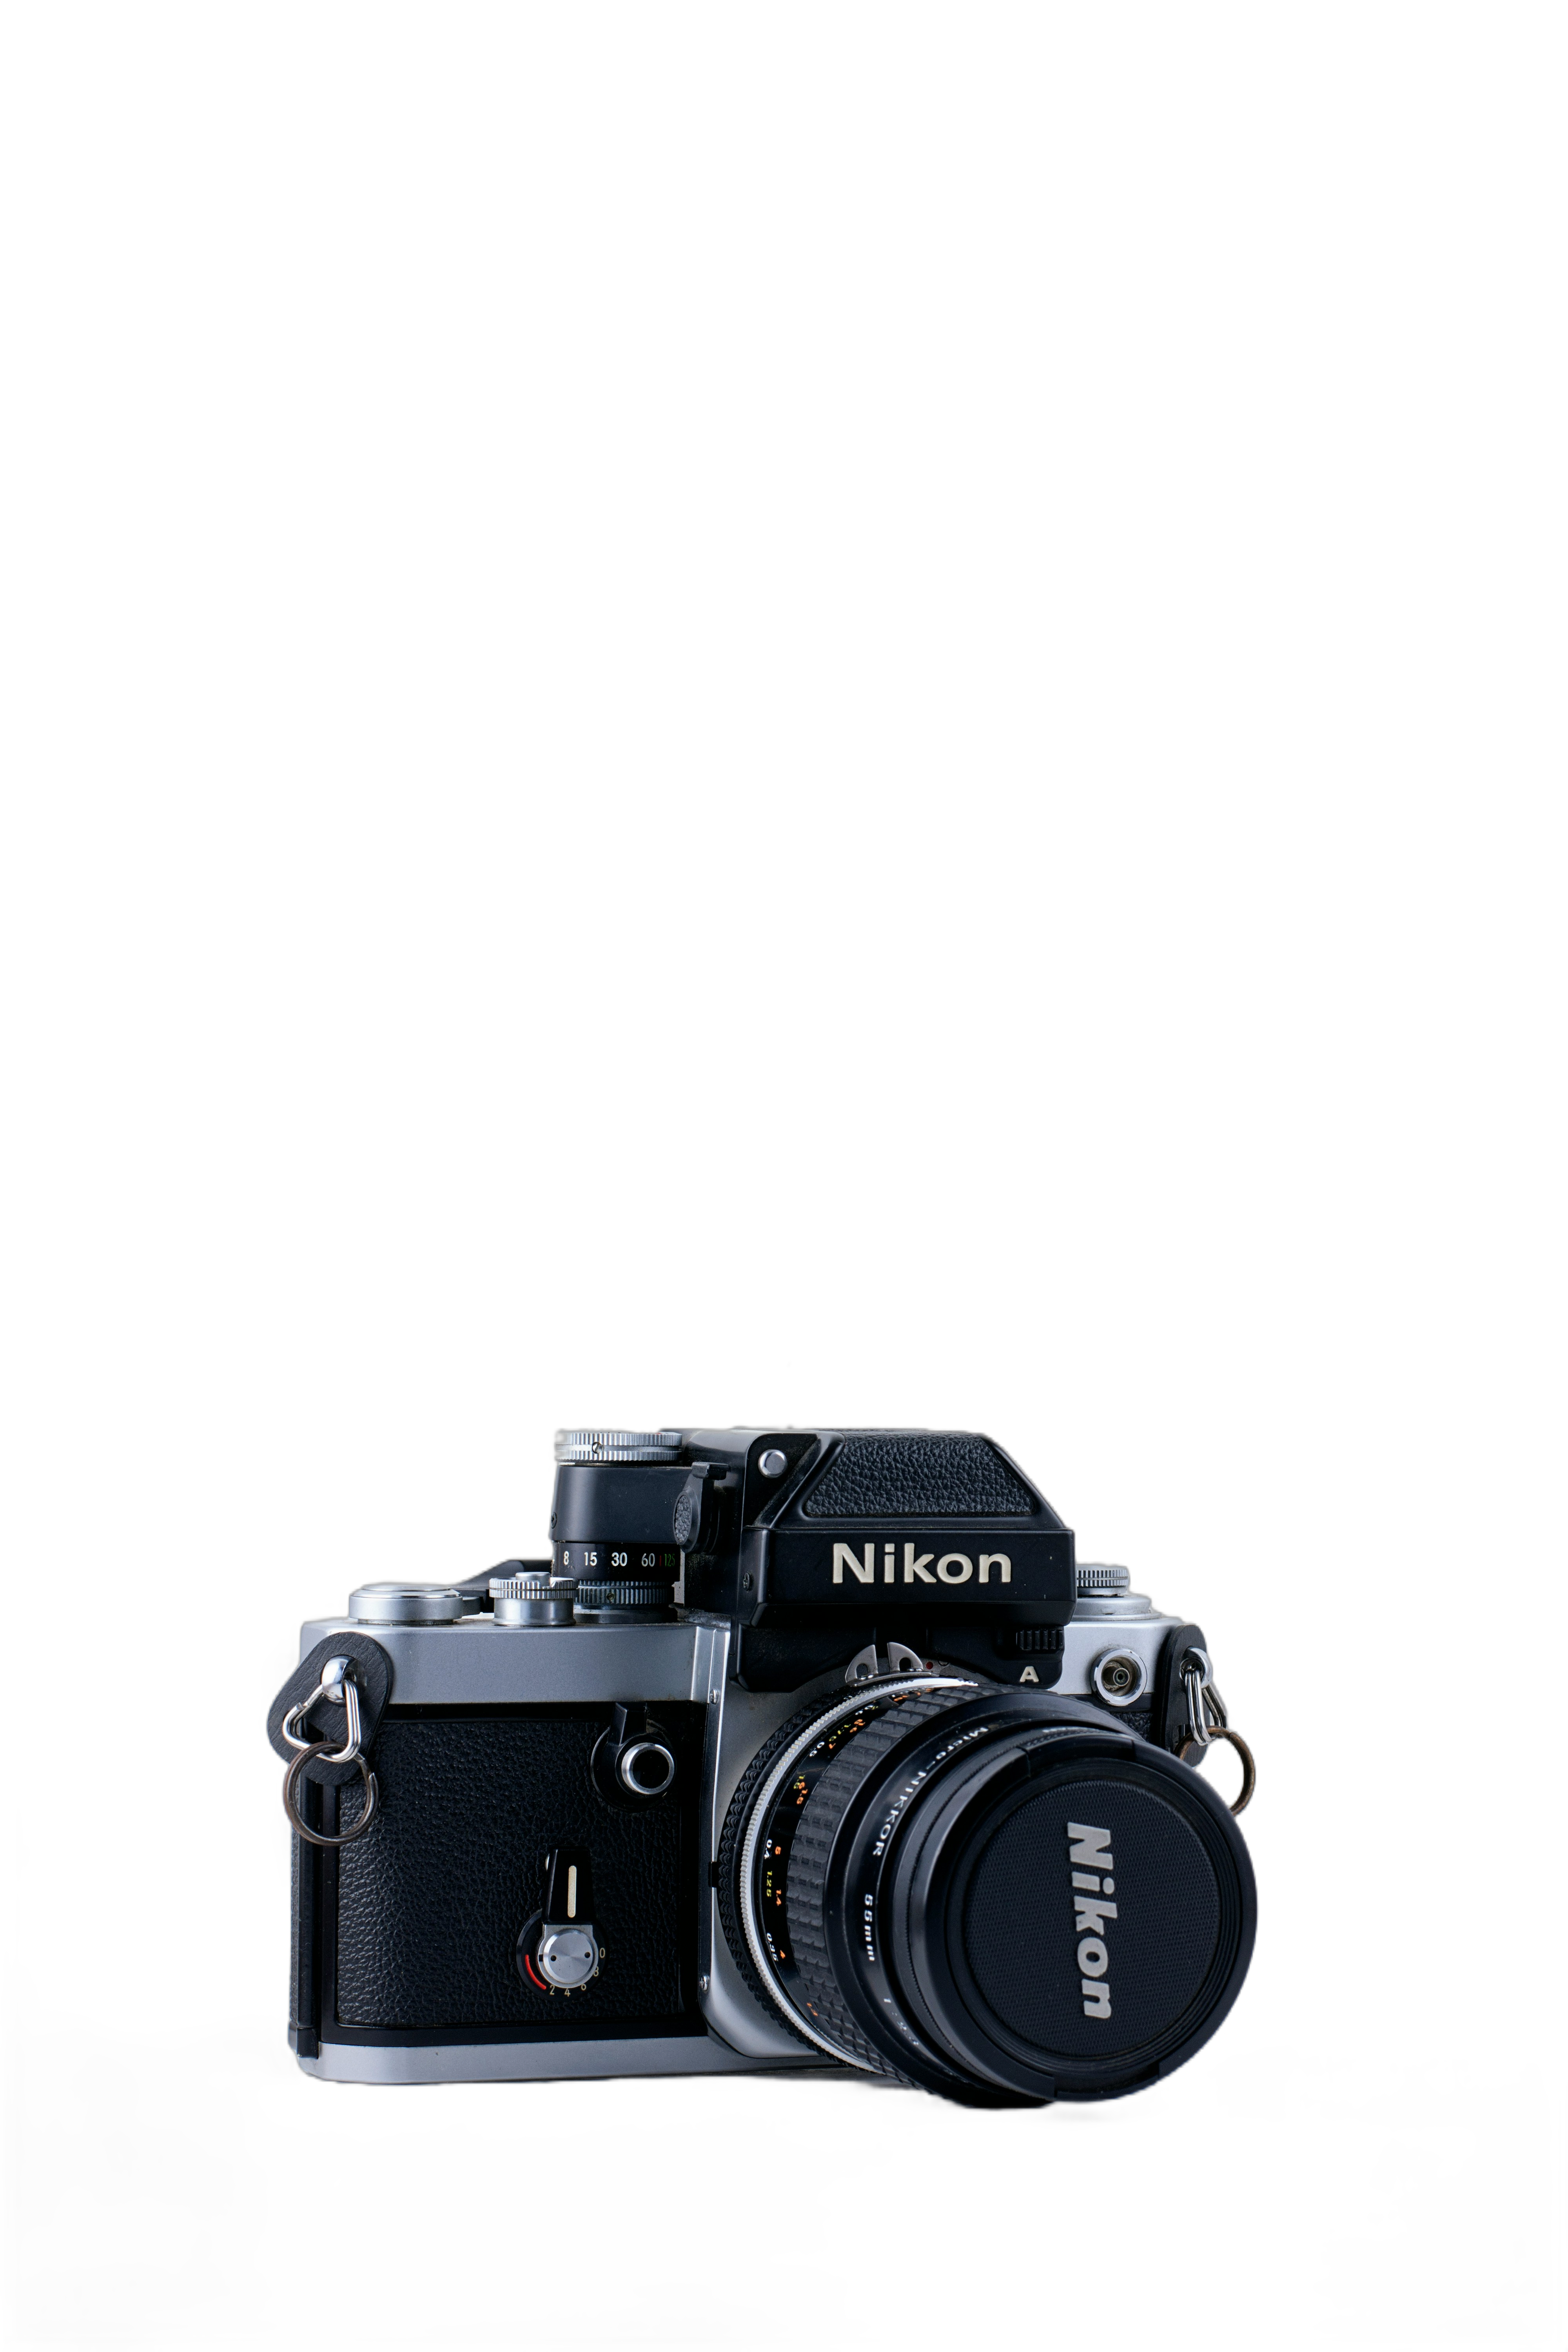

In [ ]:
pillow_image

##**Criando uma interface**

In [ ]:
pip install gradio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━

In [ ]:
import gradio as gr
from transformers import pipeline
from PIL import Image

def remove_background(image):
  pipe = pipeline('image-segmentation', model='briaai/RMBG-1.4', trust_remote_code=True)

  pillow_mask = pipe(image, return_mask=True)
  pillow_image = pipe(image)

  return pillow_image


app = gr.Interface(
    fn=remove_background,
    inputs=gr.components.Image(type='pil'),
    outputs=gr.components.Image(type='pil', format='png'),
    title='Remoção de background de imagens',
    description='Envie uma imagem e veja o background removido automaticamente. A imagem resultante será no formato PNG.'
)

app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c58e48aa060c5b838a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
